# 계층적 군집 (4)


> 
>
>
>
>


## 군집분석에서 중요한 점

### 1) 너무 많은 변수를 사용할 위험

변수를 이것 저것 다 넣으면 해주겠지라는 기대심리 경계

#### 변수를 너무 많이 넣을 경우
1. 알고리즘 실행시간 증가
2. 모델이 복잡해지면서 과적합 위험 증가
3. 결과 검토에 대한 난이도 증가

### 2) 변수간 관계 미리보기

변수간 상관관계 확인
1. 상관계수 히트맵
2. 산점도 행렬

#### 주성분분석(PCA) 분석 활용하기

주성분 분석은 데이터의 특징을 최대한 손실없이 살리면서 데이터의 차원을 축소하는 기법

클러스터링 분석에서도 취급하는 변수의 수를 줄일 때 유용하게 사용할 수 있다.


### 3) 그 밖의 내용
1. 문자열 데이터 x
2. 이상치에 민감하므로 이상치 정제 혹은 표준화를 수행할 것.

## 군집분석 결과

비지도 학습이므로 정답이 없는 상태에서 시작하므로 훈련데이터화 검증 데이터를 분할할 필요가 없다.

군집의 결과 역시 정답이 아닐 수 있다.

적용가능한 하이퍼 파라미터들을 다양하게 설정하여 시각화 결과가 가장 고르게 군집을 형성하는 경우를 선택한다. 선택 기준에 실루엣 점수를 반영하는 것도 고려할 수 있다.




## #01. 패키지 참조


In [21]:

import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from itertools import product
import warnings
warnings.filterwarnings('ignore')
# linkage는 계층적 군집분석의 알고리즘 모듈
## linked = linkage(x,'single')을 통해 최소거리 측정법으로 유사도를 측정
## dendropgram(linked,orientation = 'top',labels=labelList,distance_sort='descending',show_leaf_count = True)



## #02. 데이터 가져오기

Balance : 보너스 여행에 적합한 마일리지 

Qual_miles : Topflight 자격 취득에 필요한 마일리지 수

cc1_miles : 지난 12개월 동안의 신용카드 사용에 의해 적립된 마일리지 

cc2_miles : 지난 12개월 동안의 Reward 신용카드 사용에 의해 적립된 마일리지 

cc3_miles : 지난 12개월 동안의 법인카드 사용에 의해 적립된 마일리지 

Bonus_miles : 지난 12개월 동안 항공권 외 보너스 거래를 통햏 적립된 마일리지

Bonus_trans : 지난 12개월 동안 항공권 외 보너스 거래 점수 

Flight_miles_12mo : 지난 12개월 동안 비행 마일리지

Flight_trans_12 :  지난 12개월 동안 항공권 거래 건수

Days_since_enroll : 

Award : 



In [6]:
origin  = pd.read_excel('https://data.hossam.kr/G02/EastWestAirlines.xlsx',index_col='ID')
origin.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


> 가져온 데이에 결측치 존재여부와 이상치 여부를 확인해야함
>
> 데이터 준비과정에서 결측치가 없다는 부분은 미리 확인이 된상태임



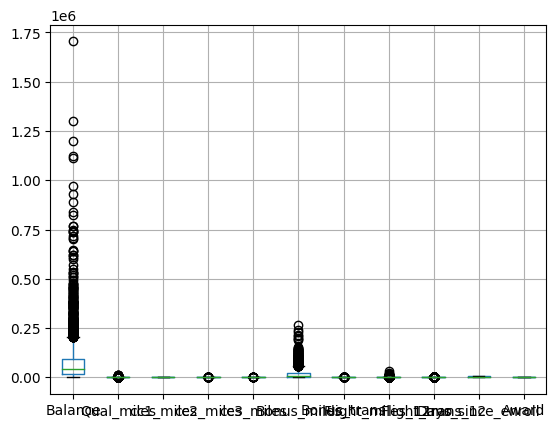

In [8]:
origin.boxplot()
plt.show()
plt.close()

> 다수의 이상치가 발견되므로 데이터 스케일링 수행

## #04. 데이터 표준화



In [10]:
scaler = StandardScaler()

n_data = scaler.fit_transform(origin)
scaled_df = pd.DataFrame(n_data, columns=origin.columns,index=origin.index)
scaled_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
2,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
3,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
4,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
5,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
4017,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
4018,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
4019,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918


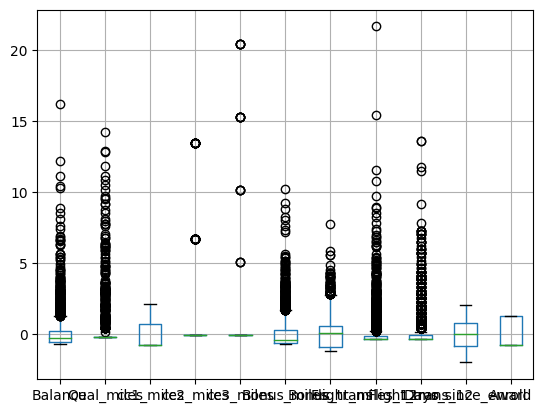

In [11]:
scaled_df.boxplot()
plt.show()
plt.close()

In [12]:
scaled_df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00,1.303918e+00


## #06. 각 변수간의 상관관계 확인

<Figure size 640x480 with 0 Axes>

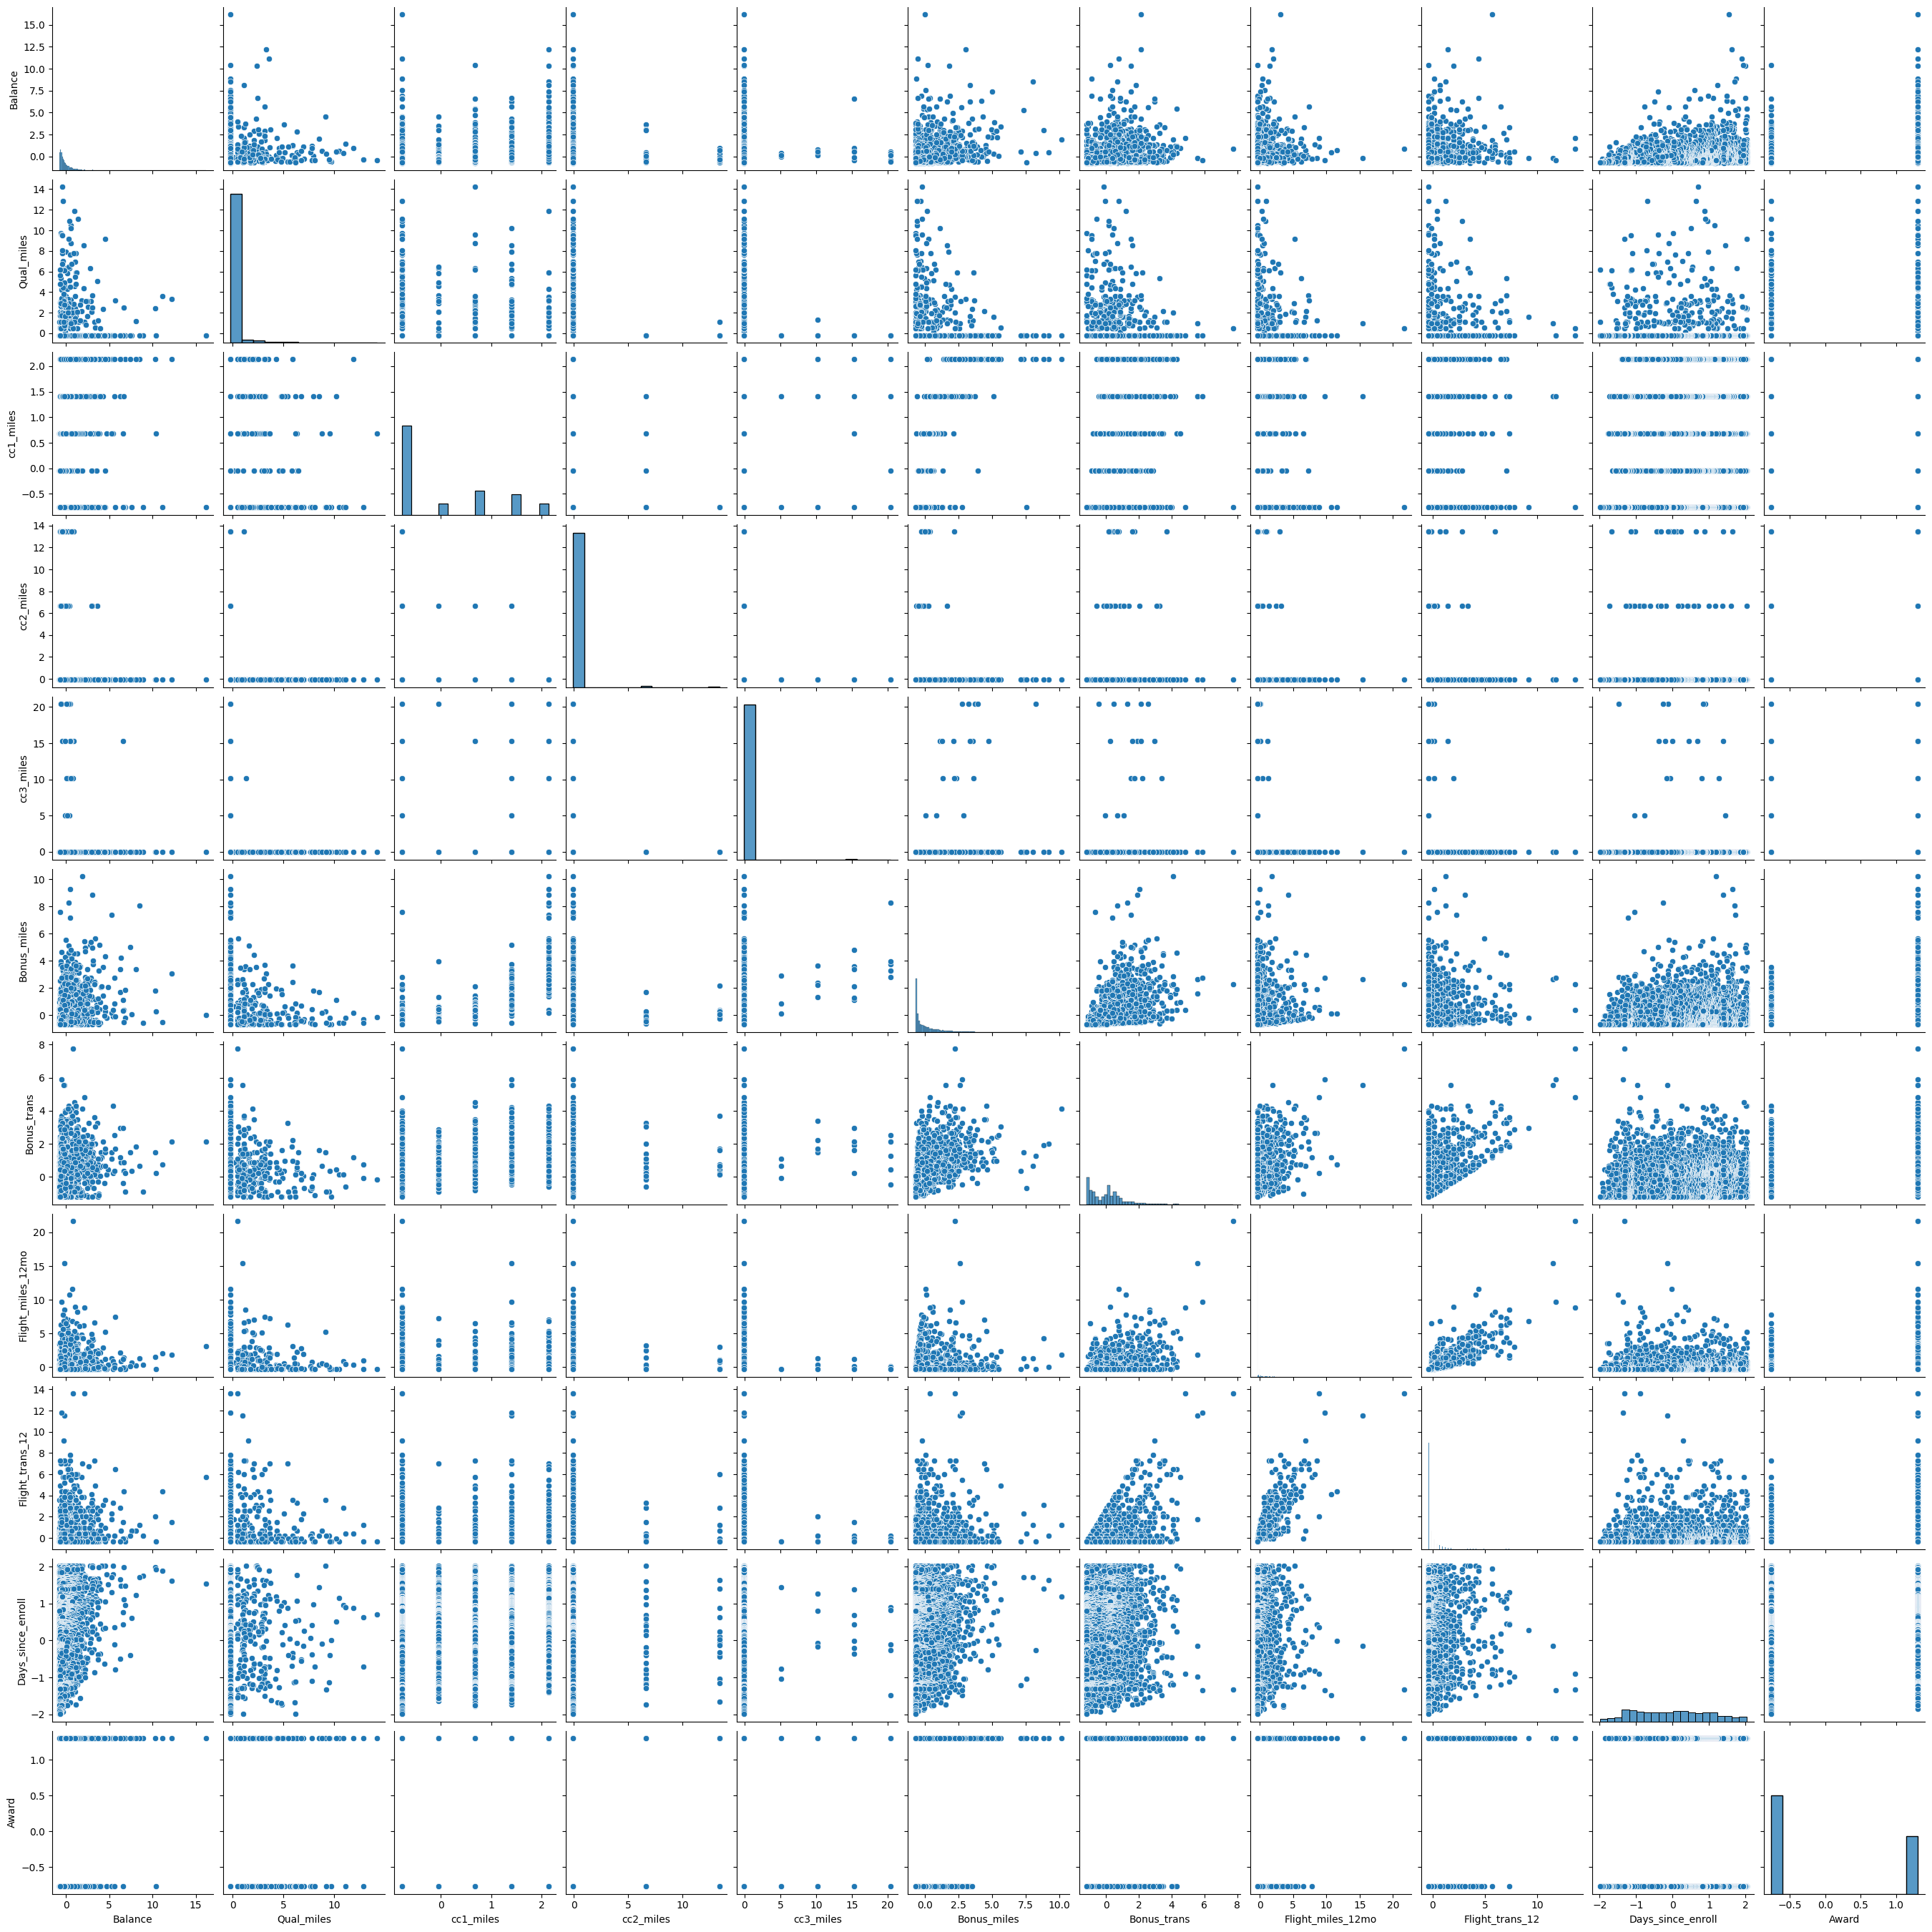

In [13]:
plt.figure()
sb.pairplot(scaled_df)

plt.show()
plt.close()

## #07. 상관계수 하트맵
히트맵을 통해서 특별히 높은 상관을 보이는 변수 묶음들이 있는지 확인

묶음별로 상대적으로 중요도가 낮다고 판단되는 변수는 분석에서 제외할 수 있다. 

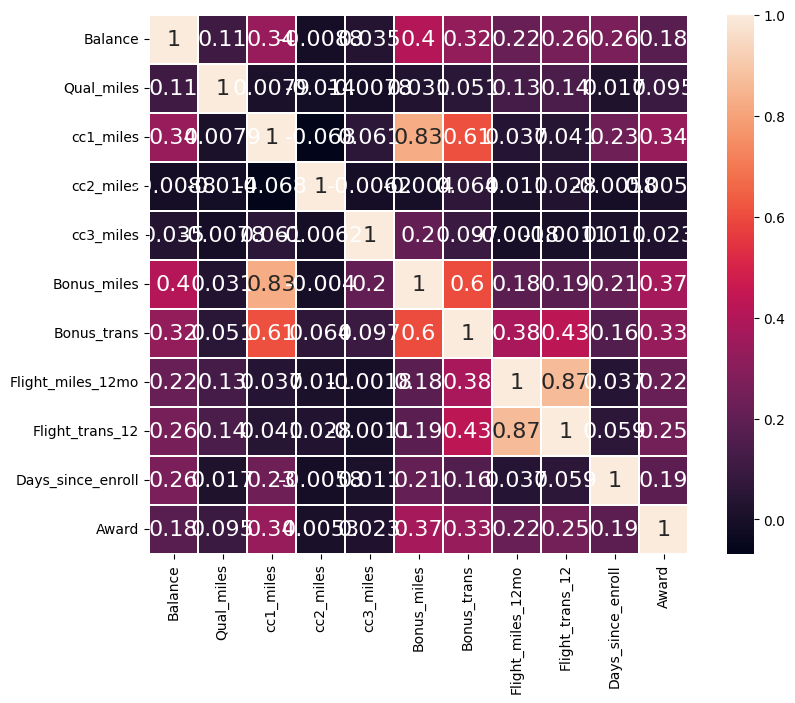

In [17]:
plt.figure(figsize=(10,7))
sb.heatmap(scaled_df.corr(),linewidths=0.1,vmax=1.0,
           square= True,linecolor='white',annot=True,annot_kws={'size' : 16})
plt.show()
plt.close()

> 상관계수 히트맵 확인 결과 Balance cc1_miles Bonus_miles Bonus_trans Flight_miles_12mo Filght_trans_12  를 주요변수

## #07. 변수 필터링

In [19]:
x = scaled_df.loc[:,['Balance', 'cc1_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']]

x.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
ID,,,,,,
1,-0.451141,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168
2,-0.539457,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168
3,-0.320031,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168
4,-0.583799,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168
5,0.239678,1.409471,1.083121,1.499394,1.154932,0.692490


## #08. 군집분석 수행

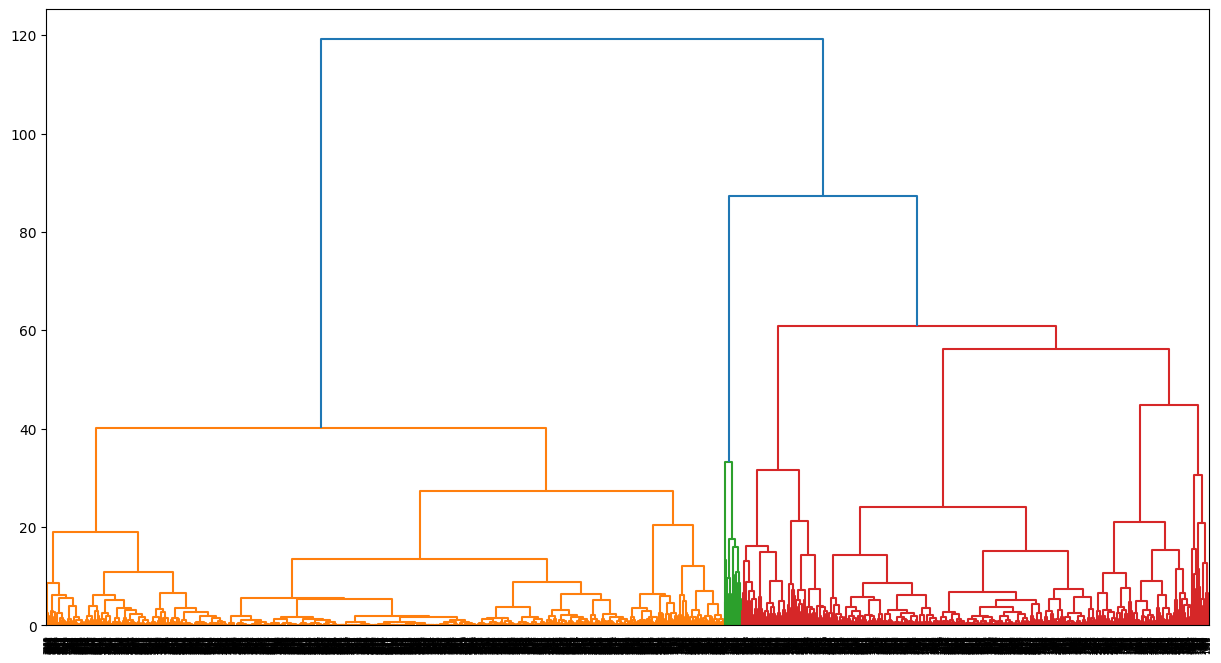

In [20]:
linked = linkage(x,method='ward',metric='euclidean')

plt.figure(figsize=(15,8))


dendrogram(linked)
plt.show()
plt.close()


In [22]:
method = ['single','complete','average','weighted','centroid','ward']

metric = ['euclidean','cityblock']

# 두개의 리스트 조합

prod = list(product(*[method,metric]))
prod

[('single', 'euclidean'),
 ('single', 'cityblock'),
 ('complete', 'euclidean'),
 ('complete', 'cityblock'),
 ('average', 'euclidean'),
 ('average', 'cityblock'),
 ('weighted', 'euclidean'),
 ('weighted', 'cityblock'),
 ('centroid', 'euclidean'),
 ('centroid', 'cityblock'),
 ('ward', 'euclidean'),
 ('ward', 'cityblock')]

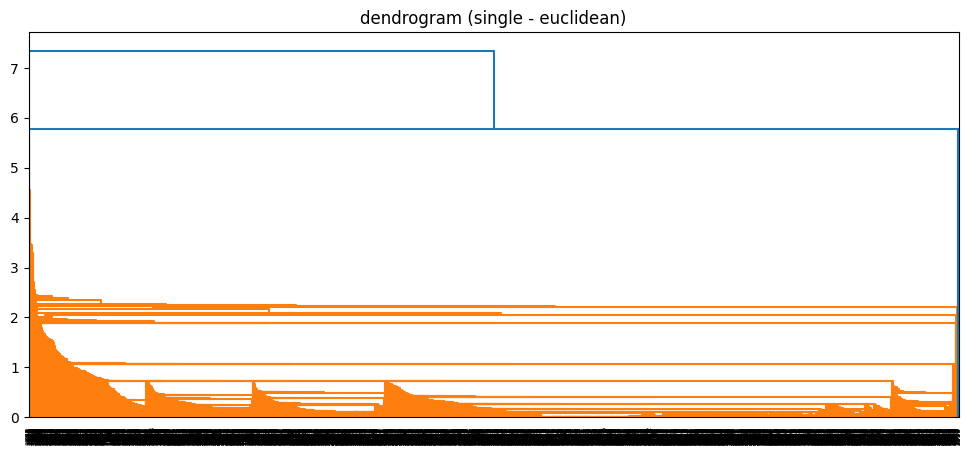

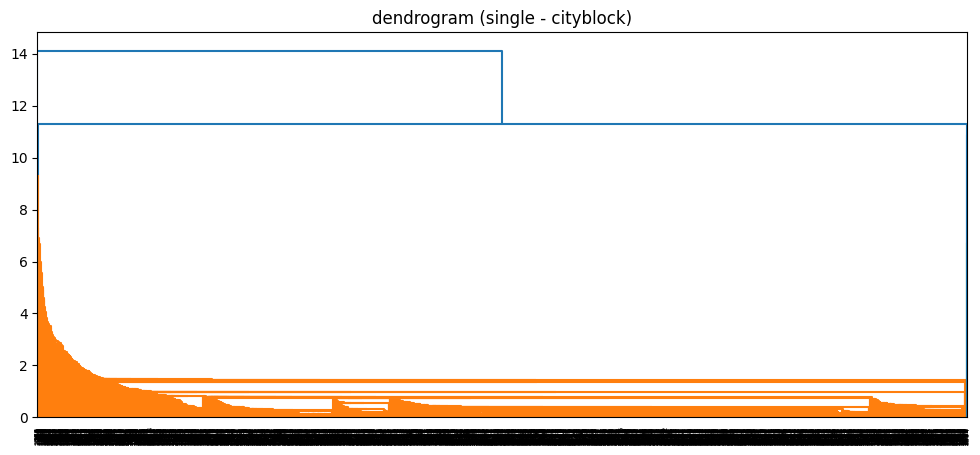

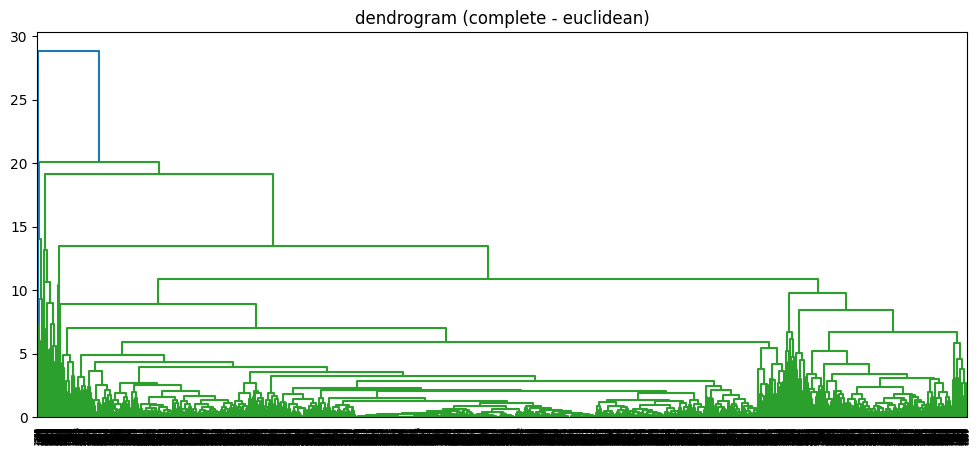

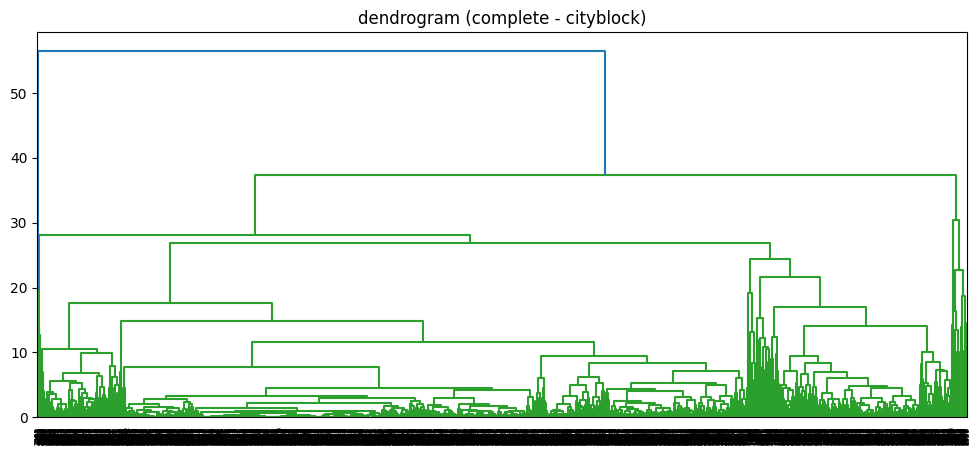

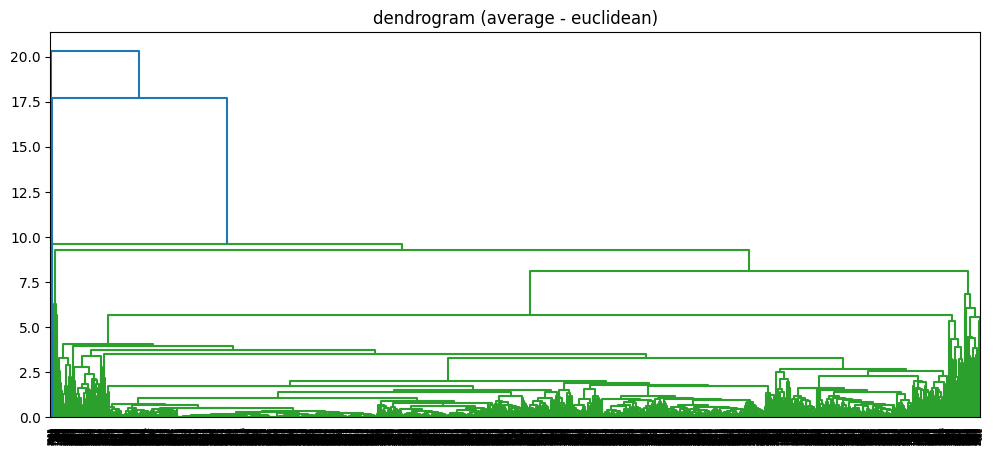

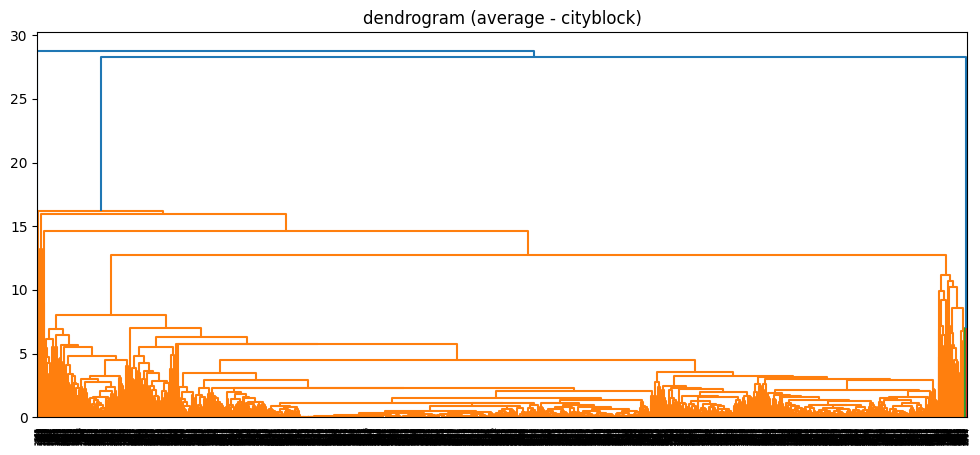

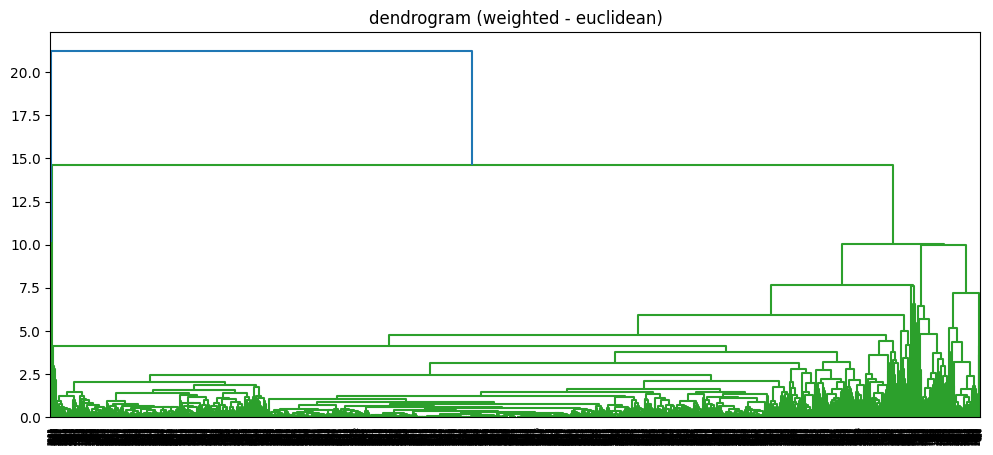

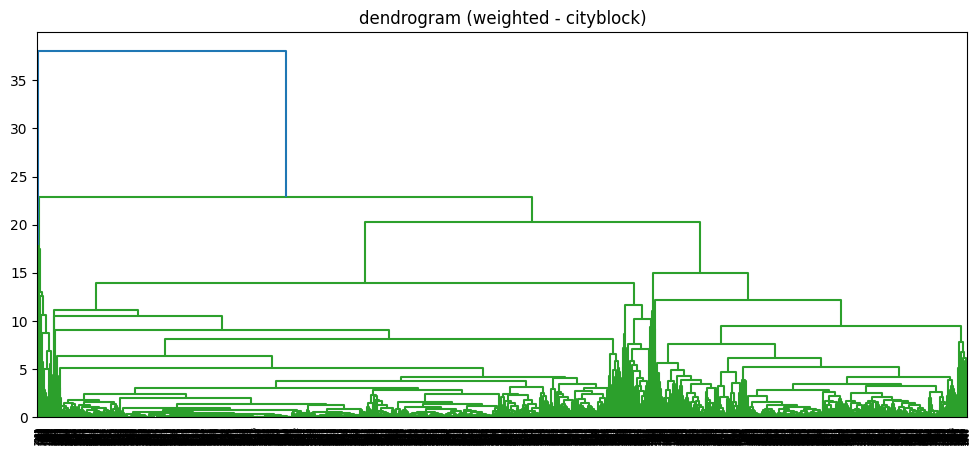

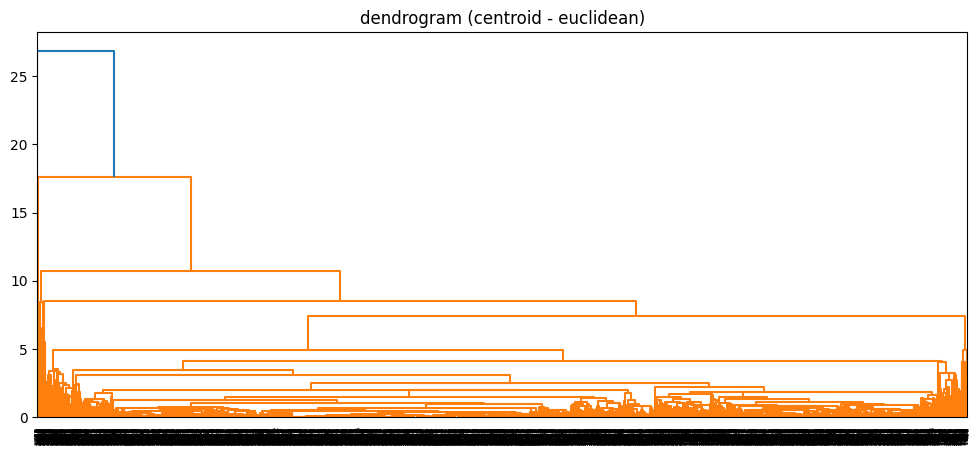

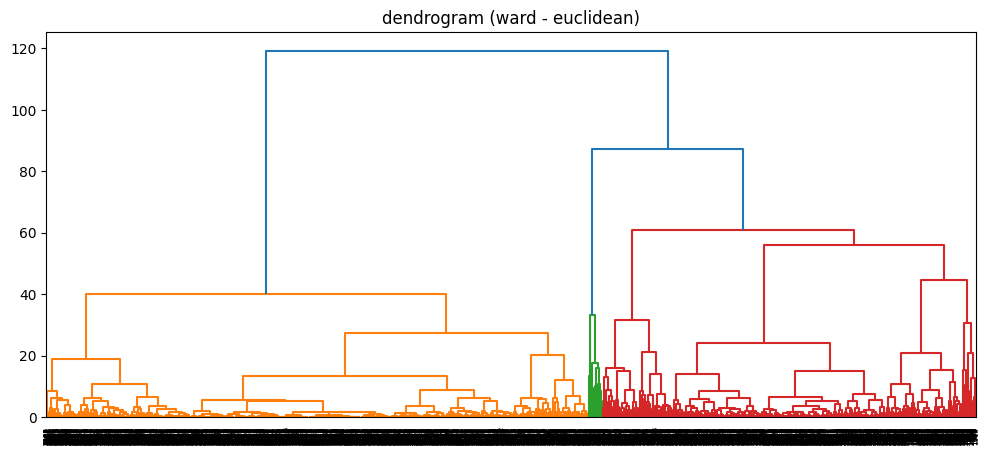

In [24]:
for method,metric in prod :
    if method in ['centroid','ward'] and metric != 'euclidean' :
        continue
                  
    z = linkage(x,method=method,metric=metric)
    plt.figure(figsize=(12,5))
    dendrogram(z)
    plt.title(f'dendrogram ({method} - {metric})')
    plt.show()
    plt.close()

## #09. 군집 결과값을 sklearn 패키지에 적용

각 개별 데이터가 어떤 군집에 속하는가를 알아보기 위해서는 sklearn.을 사용하는 것이 간편하ㅏ다


In [26]:
h_complete = AgglomerativeClustering(n_clusters=3,linkage='complete',metric='cityblock')
h_complete.fit(x)
h_complete.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

원본 데이터에 클러스터링 결과를 병합
각 고객이 어떤 클러스테어 속하는 가를 확인할수있느 데이터가 된다

In [27]:
origin['Cluster'] = h_complete.labels_
origin.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,2
2,19244,0,1,1,1,215,2,0,0,6968,0,2
3,41354,0,1,1,1,4123,4,0,0,7034,0,2
4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [28]:
origin['Cluster'].value_counts()

Cluster
2    3930
0      65
1       4
Name: count, dtype: int64